# Data Viz Workshop  
This notebook provides a set of data visualizations produced from the same data sourse (311 data).  
The aim is to provide a tutorial for transforming data and choosing the right chart types.  

Each chart is shown in a raw and finished format to display tricks in formatting charts. 

Tutorial Steps:
1. Download data from Open Data NYC, Using Socrata API (you can skip this if you prefer downloading the data from [here](https://data.cityofnewyork.us/Social-Services/NYC-311-Data/jrb2-thup))  
More information on the queries from Socata API can be found [here](https://dev.socrata.com/docs/queries/)
2. 

## Import Dependencies

In [4]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Show more columns of the df.
pd.set_option( "display.max_columns" , None )

In [7]:
# Start and end time for the query.
time_start = '2022-06-01'
time_end = '2022-06-07'

# Location: Greenpoint
lat = 40.7332
lon = -73.9564

# Radius: 1 mile in meters
radius = 1609 

# Compose Query
# Socrata API uses a SQL-like query language. You can copy and paste the base_url's output into your browser to see the results.
base_url = f"https://data.cityofnewyork.us/resource/erm2-nwe9.json?$where=created_date>='{time_start}' AND created_date<='{time_end}' AND within_circle(location, {lat}, {lon}, {radius})"
print( base_url )


https://data.cityofnewyork.us/resource/erm2-nwe9.json?$where=created_date>='2022-06-01' AND created_date<='2022-06-07' AND within_circle(location, 40.7332, -73.9564, 1609)


In [8]:
response = requests.get( base_url )

df = pd.DataFrame().from_records( response.json() )

print( "{} rows are found".format( df.shape[0] ) )
df.head()

562 rows are found


,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,status,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_state_plane,y_coordinate_state_plane,open_data_channel_type,park_facility_name,park_borough,latitude,longitude,location,facility_type,taxi_pick_up_location,due_date
0,54407110,2022-06-06T23:00:30.000,2022-06-07T01:52:47.000,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11222,5 BLUE SLIP,BLUE SLIP,DUPONT STREET,FRANKLIN STREET,DUPONT STREET,FRANKLIN STREET,ADDRESS,BROOKLYN,BLUE SLIP,Closed,The Police Department responded to the complai...,2022-06-07T01:52:52.000,01 BROOKLYN,3024727502,BROOKLYN,995400,207272,MOBILE,Unspecified,BROOKLYN,40.73558338244384,-73.95976658433176,"{'latitude': '40.73558338244384', 'longitude':...",NaN,NaN,NaN
1,54405222,2022-06-06T22:59:18.000,2022-06-07T09:16:07.000,NYPD,New York City Police Department,Noise - Residential,Loud Talking,Residential Building/House,11222,300 KINGSLAND AVENUE,KINGSLAND AVENUE,NASSAU AVENUE,NORMAN AVENUE,NASSAU AVENUE,NORMAN AVENUE,ADDRESS,BROOKLYN,KINGSLAND AVENUE,Closed,The Police Department responded to the complai...,2022-06-07T09:16:13.000,01 BROOKLYN,3026580052,BROOKLYN,1000367,204136,ONLINE,Unspecified,BROOKLYN,40.726968176521396,-73.9418512865207,"{'latitude': '40.726968176521396', 'longitude'...",NaN,NaN,NaN
2,54411230,2022-06-06T21:20:32.000,2022-12-19T11:03:45.000,DPR,Department of Parks and Recreation,Maintenance or Facility,Unsecured Facility,Park,11222,5 COMMERCIAL STREET,COMMERCIAL STREET,DUPONT STREET,FRANKLIN STREET,DUPONT STREET,FRANKLIN STREET,ADDRESS,BROOKLYN,COMMERCIAL STREET,Closed,NYC Parks has completed the requested work ord...,2022-12-19T11:03:51.000,01 BROOKLYN,3024720075,BROOKLYN,995419,207286,MOBILE,Newtown Barge Playground,BROOKLYN,40.735621785012405,-73.95969800191561,"{'latitude': '40.735621785012405', 'longitude'...",NaN,NaN,NaN
3,54395401,2022-06-06T21:15:47.000,2022-06-06T21:47:37.000,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222,1117 MANHATTAN AVENUE,MANHATTAN AVENUE,CLAY STREET,BOX STREET,CLAY STREET,BOX STREET,ADDRESS,BROOKLYN,MANHATTAN AVENUE,Closed,The Police Department responded to the complai...,2022-06-06T21:47:42.000,01 BROOKLYN,3024820039,BROOKLYN,996626,207690,ONLINE,Unspecified,BROOKLYN,40.736729058522776,-73.95534194457652,"{'latitude': '40.736729058522776', 'longitude'...",NaN,NaN,NaN
4,54400047,2022-06-06T20:51:25.000,2022-06-06T21:42:30.000,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11109,48-09 CENTER BOULEVARD,CENTER BOULEVARD,48 AVENUE,49 AVENUE,48 AVENUE,49 AVENUE,ADDRESS,LONG ISLAND CITY,CENTER BOULEVARD,Closed,The Police Department responded to the complai...,2022-06-06T21:42:34.000,02 QUEENS,4000180001,QUEENS,995896,210613,MOBILE,Unspecified,QUEENS,40.744752956981145,-73.95797104482422,"{'latitude': '40.744752956981145', 'longitude'...",NaN,NaN,NaN


## Transform and Visualize

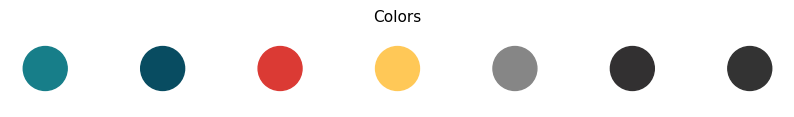

In [85]:
# Set Up Colors
l_blue = "#177e89"
d_blue = "#084c61"
orange = "#db3a34"
yellow = "#ffc857"
brown = "#323031" 
grey = "#868686"
black = "#333"

# Available fonts by default: https://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/
import matplotlib.font_manager # Necessary to find fonts
csfont = {'fontname':'Open Sans'}

# Plot Colors 
colors = [ l_blue, d_blue, orange, yellow, grey, brown, black ]
plt.figure( figsize = ( 10, 1 ) )
plt.scatter(
    [i for i,color in enumerate(colors) ], # x location
    [1] * len(colors), # y location
    color = colors,
    s = 1000,
    
)
plt.axis('off')

plt.title( "Colors" , **csfont, fontsize = 11 );


### Bar Chart  
Bar charts are the simplest charts in data visualization. As a rule-of-thumb if a visualization can be bar charts, use barcharts.  

Keys to using bar charts effectively:
- Start numeric axis at 0
- Limit the number of bars used
- Do not use accessive color schemes or ramps
- Remove unnecessary elements from the default template
- Annotate the charts
- If tick values are very long, use horizontal charts

In [71]:
# Count Complaints by Agency Name
complaint_counts = df.groupby('complaint_type').size().sort_values(ascending=True)
complaint_counts

complaint_type
FLOORING/STAIRS              1
Noise - Park                 1
Water Conservation           1
Litter Basket Complaint      1
Indoor Air Quality           1
                          ... 
Noise                       25
Noise - Commercial          31
Noise - Street/Sidewalk     45
Noise - Residential         66
Illegal Parking            136
Length: 68, dtype: int64

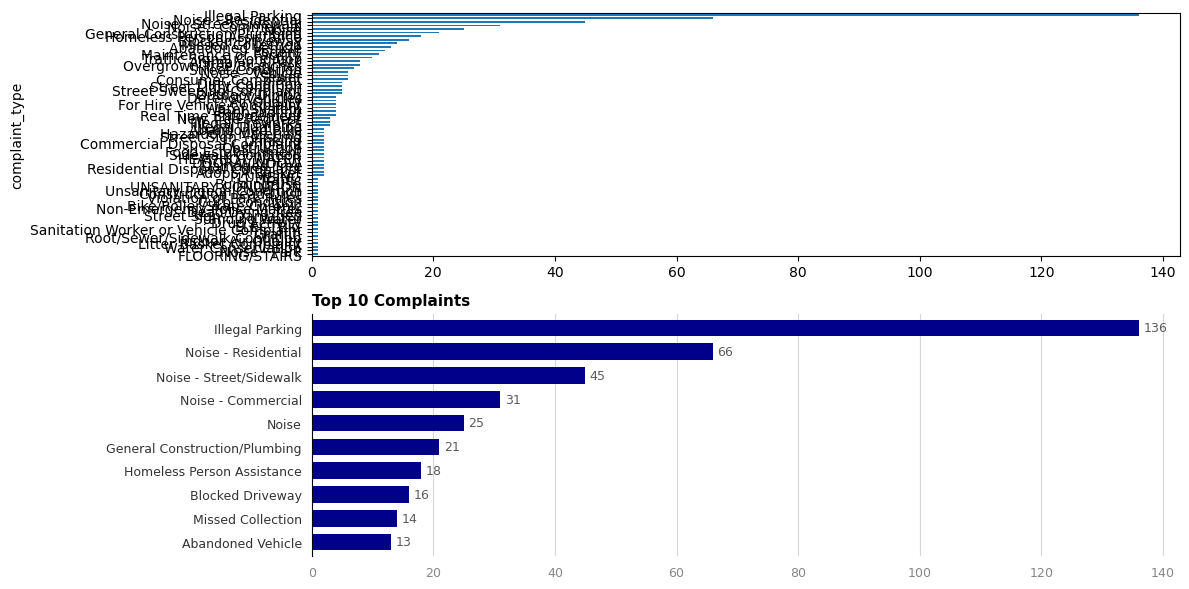

In [88]:
import matplotlib.font_manager 

# ---- PLOT ----
fig,axs = plt.subplots( figsize=(12,6) , nrows = 2 )

# 1. default bar chart
ax = axs[0] # First subplot
complaint_counts.plot(kind='barh', ax=ax )

# 2. Stylized bar chart
ax = axs[1] # First subplot
complaint_counts.tail(10).plot(kind='barh', ax=ax, width=0.7, color='darkblue', zorder = 2 )

# Annotate each bar with the value
for p in ax.patches:
    ax.annotate( str(p.get_width()), (p.get_width() + 0.75 , p.get_y()+0.075 ), fontsize=9, fontweight='light', alpha = 0.8, color=black, va='bottom', **csfont )

# tick marks and 0-line
sns.despine(ax=ax, bottom = True )
ax.tick_params( left=False, bottom=False )

# change x-tick fonts
for tick in ax.get_xticklabels():
    tick.set_fontname("Open Sans")
    tick.set_fontsize(9)
    tick.set_color( grey )

# change y-tick fonts
for tick in ax.get_yticklabels():
    tick.set_fontname("Open Sans")
    tick.set_fontsize(9)
    tick.set_color( black )

# Title
ax.set_title("Top 10 Complaints", fontsize=11, fontweight="bold", loc="left")

# Grid on X axis
ax.grid(axis='x', linestyle='-', alpha=0.5, zorder = 0 )
ax.set_ylabel("") # remove y-axis label
plt.tight_layout( h_pad=1 )

### Line Chart / Area Chart  

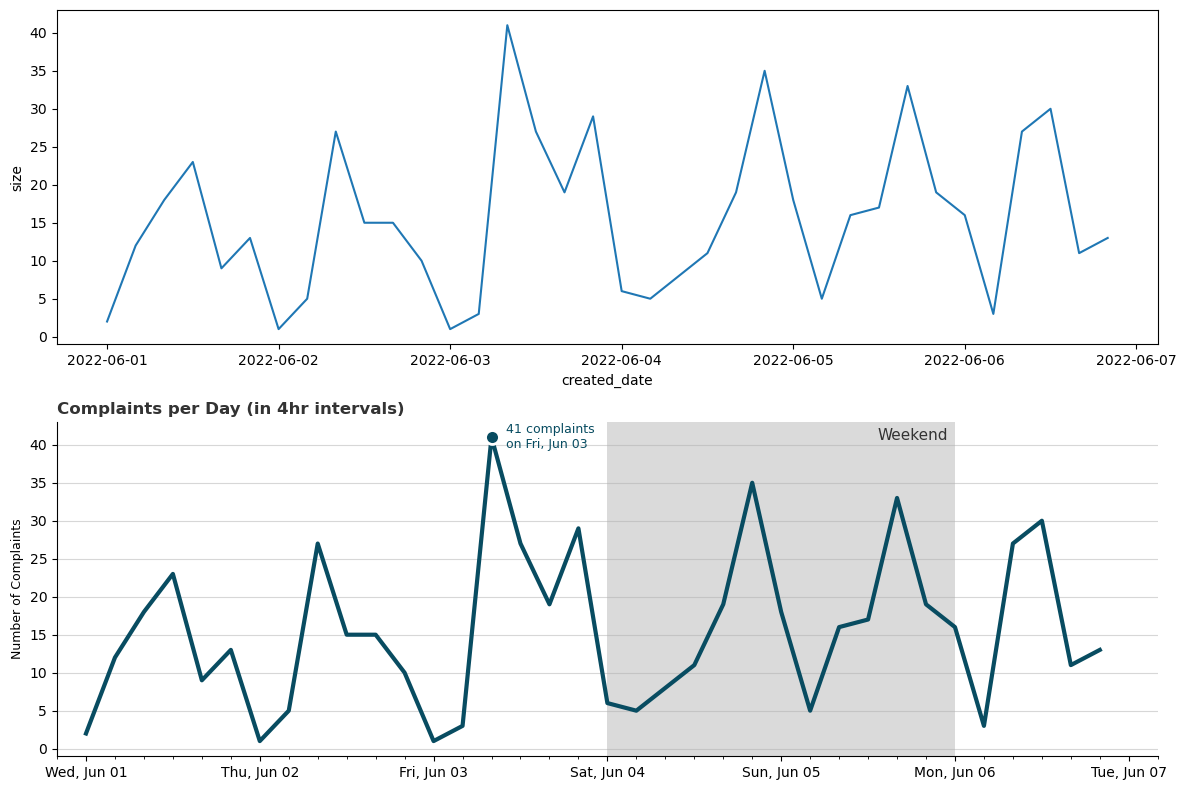

In [283]:
import matplotlib.font_manager 

complaint_per_day = df.groupby(
    pd.Grouper( key = 'created_date', freq = '4h' ),
    as_index = False
).size()

# ---- PLOT ----
fig,axs = plt.subplots( figsize=(12,8) , nrows = 2)

# 1. default bar chart
ax = axs[0]
sns.lineplot(
    data = complaint_per_day,
    x = 'created_date',
    y = 'size',
    ax = ax
)


# 2. Stylized line chart
ax = axs[1]

# ---- line chart
sns.lineplot(
    data = complaint_per_day,
    x = 'created_date',
    y = 'size',
    color = d_blue,
    lw=3,
    zorder = 2,
    ax = ax
)

# ---- most complaint
most_complaint = complaint_per_day.sort_values( by = 'size', ascending = False ).head(1)
ax.scatter(
    most_complaint['created_date'],
    most_complaint['size'],
    color = d_blue,
    s = 100,
    zorder = 4,
    ec='w',
    lw=2
)

# ---- annotate most complaint
ax.annotate(
    f"{most_complaint['size'].values[0]} complaints\non {most_complaint['created_date'].tolist()[0].strftime('%a, %b %d')}" ,
    ( most_complaint['created_date'].values[0] + pd.Timedelta( hours = 2 ), most_complaint['size'].values[0] ),
    fontsize = 9,
    fontweight = 'light',
    color = d_blue,
    ha = 'left',
    va = 'center',
    **csfont
)

sns.despine(ax=ax)

# Major ticks 1 per day
import matplotlib.dates as mdates
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=4))

# change x-tick labels format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a, %b %d'))
ax.set_xlabel("")

ax.grid(axis='y', linestyle='-', alpha=0.5, zorder = 0 )

# ---- WEEKEND
# Grey fill for weekend days
complaint_per_day[ complaint_per_day['created_date'].dt.day_of_week >= 5 ]['created_date'].apply(
    lambda x: ax.axvspan( x, x + pd.Timedelta( hours = 4 ), facecolor = grey, edgecolor = None , alpha = 0.3, zorder = 0 )
)

# Annotate weekend
plt.annotate(
    text = 'Weekend',
    xy=( complaint_per_day[ complaint_per_day['created_date'].dt.day_of_week >= 5 ]['created_date'].max() + pd.Timedelta(hours=3) , 40.25 ),
    **csfont,
    fontsize = 11,
    color = black,
    va='bottom',
    ha='right'

)

ax.set_ylabel("Number of Complaints", **csfont, fontsize = 9 )
ax.set_title("Complaints per Day (in 4hr intervals)", fontsize=12, fontweight="bold", loc="left", **csfont , color = black )
ax.set_xlim( pd.to_datetime(time_start)-pd.Timedelta(hours=4), pd.to_datetime(time_end)+pd.Timedelta(hours=4) )

plt.tight_layout( h_pad=1 );


### HeatMaps

In [347]:
compaints_per_day = pd.pivot_table(
    df[df['agency_name'] == 'New York City Police Department'],
    columns = pd.Grouper( key = 'created_date', freq = '1D' ),
    index = 'complaint_type',
    values = 'unique_key',
    aggfunc = 'nunique'
).fillna(0)

compaints_per_day['total'] = compaints_per_day.sum(axis=1)
compaints_per_day = compaints_per_day.sort_values( by = 'total', ascending = False )

# Top %80 percent complaints
p90 = compaints_per_day['total'].sum() * 0.95

# Top %10 percent complaints
# take complaints adding up to 90% of total complaints
min_other = compaints_per_day[ compaints_per_day['total'].cumsum() < p90 ]['total'].min()

# if total is lower than min_other then group it as other
compaints_per_day['complaint_type_2'] = compaints_per_day.apply(
    lambda x: 'Other' if x['total'] < min_other else x.name,
    axis = 1
)

compaints_per_day = compaints_per_day.groupby('complaint_type_2').sum().sort_values( by = 'total', ascending = False )

# move Other to the end
compaints_per_day = compaints_per_day.reindex( [ x for x in compaints_per_day.index if x != 'Other' ] + ['Other'] )

compaints_per_day

created_date,2022-06-01 00:00:00,2022-06-02 00:00:00,2022-06-03 00:00:00,2022-06-04 00:00:00,2022-06-05 00:00:00,2022-06-06 00:00:00,total
complaint_type_2,,,,,,,
Illegal Parking,13.0,16.0,27.0,20.0,40.0,20.0,136.0
Noise - Residential,2.0,4.0,15.0,23.0,14.0,8.0,66.0
Noise - Street/Sidewalk,3.0,1.0,6.0,11.0,19.0,5.0,45.0
Noise - Commercial,2.0,5.0,7.0,6.0,7.0,4.0,31.0
Blocked Driveway,6.0,2.0,3.0,2.0,0.0,3.0,16.0
Abandoned Vehicle,5.0,1.0,4.0,0.0,2.0,1.0,13.0
Other,1.0,2.0,5.0,2.0,6.0,4.0,20.0


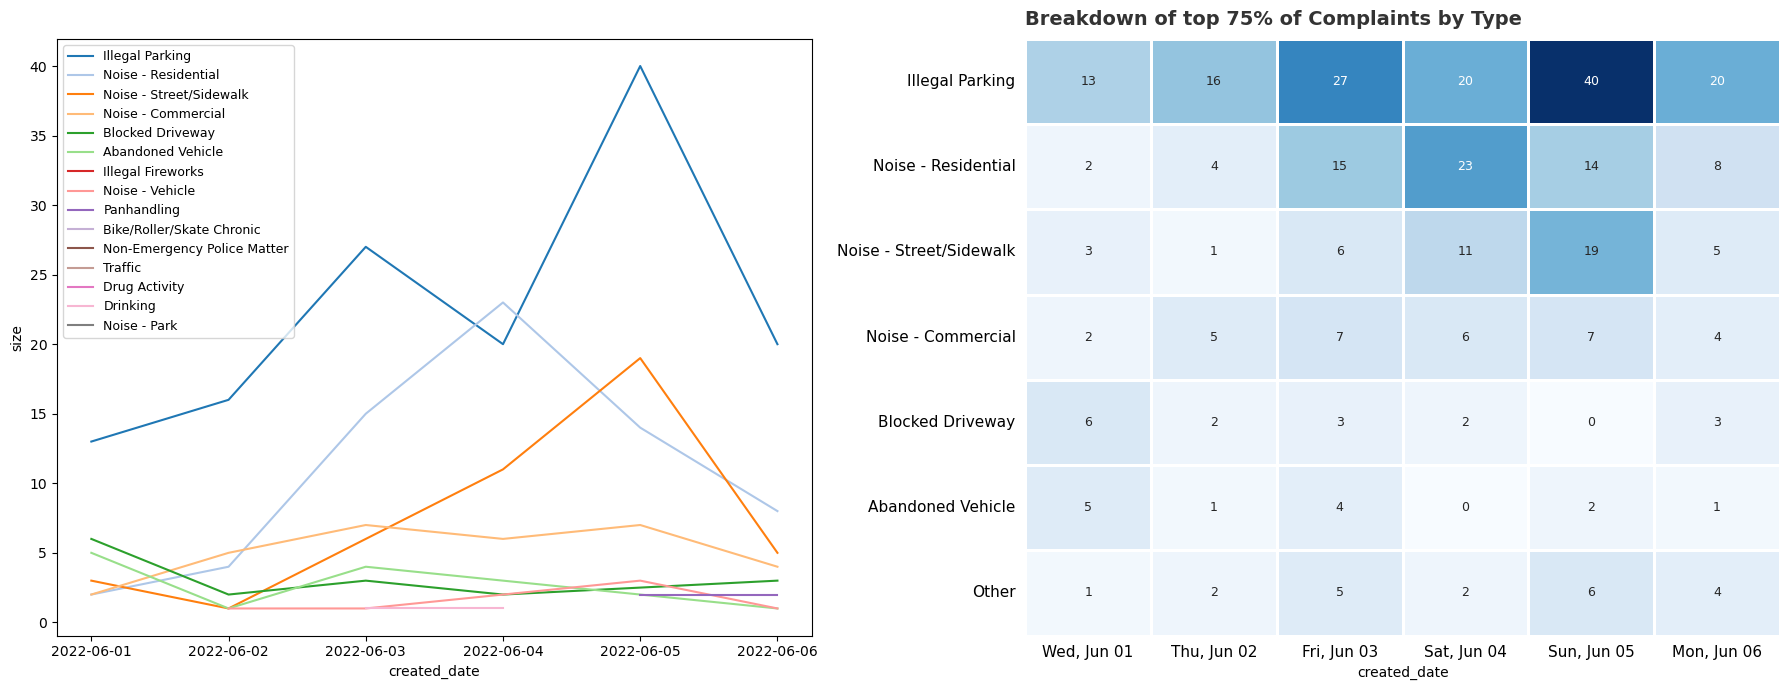

In [355]:
fig,axs = plt.subplots( figsize = (18,7) , ncols = 2 )

ax = axs[0]
daily_complaints = df[df['agency_name'] == 'New York City Police Department'].groupby(
    [pd.Grouper( key = 'created_date', freq = '1D' ), 'complaint_type'],
    as_index = False
).size().sort_values( by = 'size', ascending = False )

sns.lineplot(
    data = daily_complaints,
    x = 'created_date',
    y = 'size',
    hue = 'complaint_type',
    ax= ax ,
    palette = 'tab20',
)

ax.legend( loc = 'upper left', bbox_to_anchor = (0,1), ncol = 1, fontsize = 9 )

ax = axs[1]
sns.heatmap(
    compaints_per_day.drop( columns = 'total' ),
    cmap = 'Blues',
    annot = True,
    fmt = '.0f',
    annot_kws = {'fontsize':9},
    cbar = False,
    linewidths = 1,
    linecolor = 'w',
    ax = ax
)

# cahnge x-tick format
ax.set_xticklabels( [ x.strftime('%a, %b %d') for x in compaints_per_day.drop( columns = 'total' ).columns ] , rotation = 0, ha = 'center' )
ax.tick_params( axis = 'both', which = 'both', left = False, bottom = False, labelsize = 11 )
ax.set_ylabel('')
ax.set_title( "Breakdown of top 75% of Complaints by Type", fontsize = 14, fontweight = 'bold', loc = 'left', **csfont, color = black, pad = 10 )

plt.tight_layout( w_pad = 1 );